<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/SMOTE_and_image_augmentation_to_over_sample_the_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMOTE is the most widely used techniqe for over smapling the minority calss.
 SMOTE works by creating lines between the minority class data points and generate new data among the created lines.


In [57]:
import imblearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import numpy as np

In [58]:
x,y = make_classification(n_samples=10000 ,n_features=2,n_redundant=0,weights=[0.99])

Lets check the data size for each class

In [59]:
x1 = x[:,0]
x2 = x[:,1]
x1 = x1[y==0]
x2 = x2[y==1]
print('Size of the first class={} and the size of the second class={}'.format(len(x1),len(x2)))

Size of the first class=9859 and the size of the second class=141


Visualize the data in each class

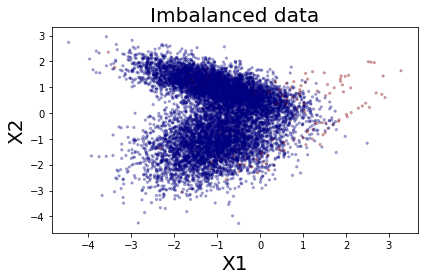

In [63]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='jet',alpha=0.3,s=5);
plt.xlabel('X1',fontsize=20);
plt.ylabel('X2',fontsize=20);
plt.title('Imbalanced data',fontsize=20);
plt.tight_layout()


Over sample the data points in the second class

In [61]:
oversample = SMOTE()
X_new, y_new = oversample.fit_resample(x, y)


Visualize the data in each class after using SMOTE

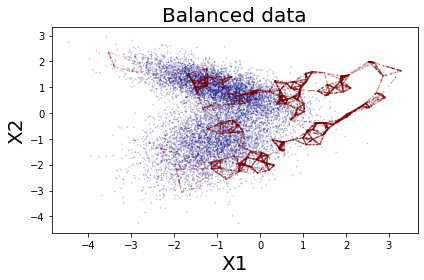

In [62]:
plt.scatter(X_new[:,0],X_new[:,1],c=y_new,cmap='jet',alpha=0.3,s=0.2);
plt.xlabel('X1',fontsize=20);
plt.ylabel('X2',fontsize=20);
plt.title('Balanced data',fontsize=20);
plt.tight_layout()

Check the new size after resampling 

In [41]:
x1_new = X_new[:,0]
x2_new = X_new[:,1]
x1_new = x1_new[y_new==0]
x2_new = x2_new[y_new==1]

In [68]:
print('Size of the first class={} and the size of the second class={}'.format(len(x1_new),len(x2_new)))

Size of the first class=9841 and the size of the second class=9841


# image augmentation using ImageDataGenrator from keras
Please note, when performing a training we should have augment the data in place and not save them to disk.. It means we have to generate random augmented data at each epoch to generalize the learning process of the model 

In [27]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

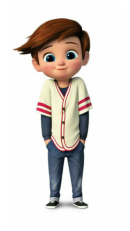

In [3]:
im = plt.imread('image.jpeg')
plt.imshow(im);
plt.axis('off')
im = im.reshape((1,)+im.shape)

# Random shift

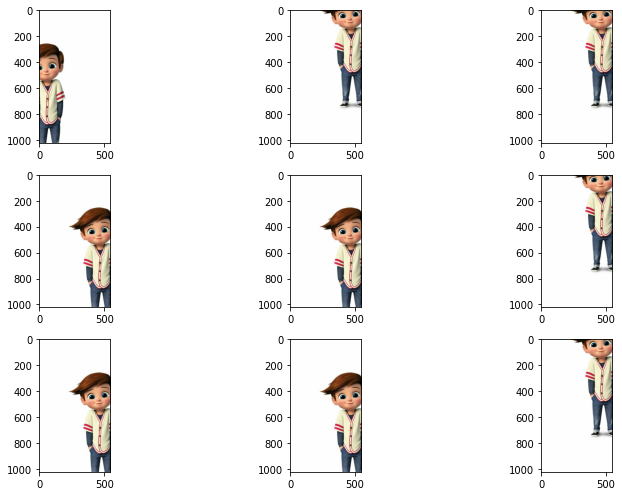

In [13]:
datagen = ImageDataGenerator(width_shift_range=[-200,200],height_shift_range=[-200,200])
it = datagen.flow(im, batch_size=1)
plt.figure(figsize=(12,7))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.axis('on')
  batch = it.next()
  image = batch[0]
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.tight_layout()


Horizontal vertical flip and rotation

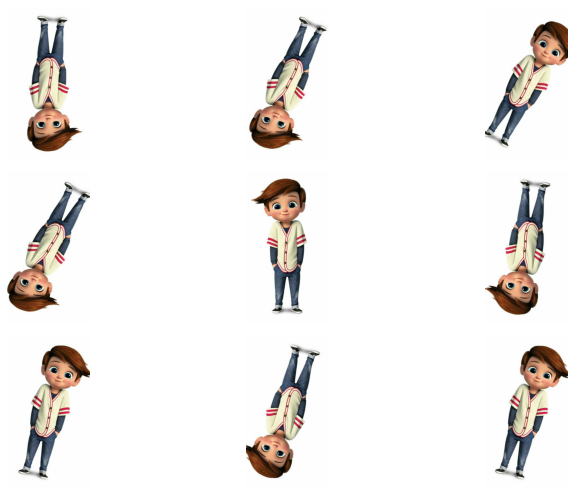

In [19]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30)
it = datagen.flow(im, batch_size=1)
plt.figure(figsize=(12,7))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.axis('off')
  batch = it.next()
  image = batch[0]
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.tight_layout()


ZOOM and Gaussian noise
---



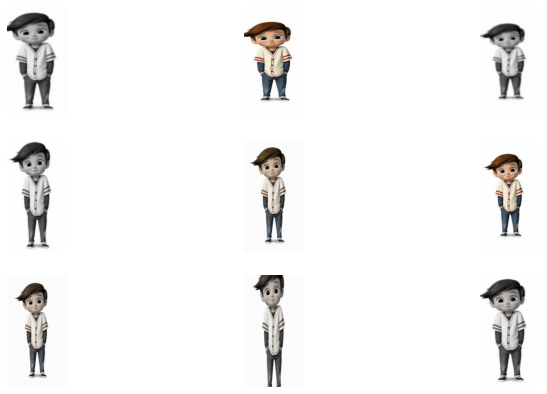

In [52]:
from scipy.ndimage import gaussian_filter

datagen = ImageDataGenerator(zoom_range=0.3);
it = datagen.flow(im, batch_size=1)
plt.figure(figsize=(12,7))
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.axis('off')
  batch = it.next()
  image = batch[0]
  image = batch[0].astype('uint8')
  plt.imshow(gaussian_filter(image,np.random.uniform(0,5)))
